### Описание датасета

A data frame with 53940 rows and 10 variables:

price - price in US dollars ($326–$18,823)  
carat - weight of the diamond (0.2–5.01)  
cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)  
color - diamond colour, from D (best) to J (worst)  
clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))  
x - length in mm (0–10.74)  
y - width in mm (0–58.9)  
z - depth in mm (0–31.8)  
depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)  
table - width of top of diamond relative to widest point (43–95)

### Загрузка данных

In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
item = 'diamonds' # Выбрать из поля Item для вашего датасета
package = 'ggplot2' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [39]:
cut_dict = {
    'Fair' : 0,
    'Good' : 1, 
    'Very Good' : 2, 
    'Premium' : 3,
    'Ideal' : 4
}

df['cut_value'] = df['cut'].map(cut_dict)

### 1. Постройте столбчатую диаграмму

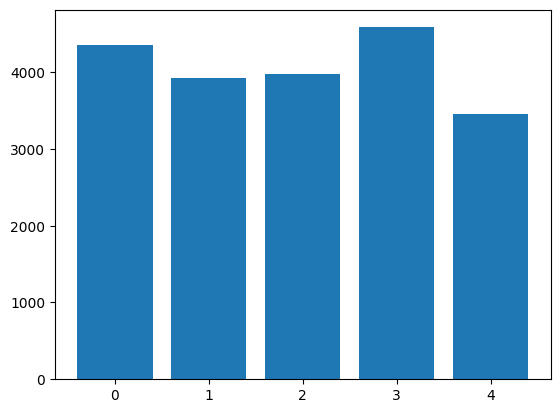

In [41]:
data = df.groupby('cut_value')['price'].mean().reset_index()

plt.bar(x = data['cut_value'], height = data['price'])
plt.show()

Средняя цена алмаза не зависит от качества. Ну... может быть... совсем немного. И, если такая зависимость и есть, то она обратная, т.е. чем выше качество, тем ниже средняя цена алмаза.

### 2. Постройте гистограмму с распределением числовой переменной

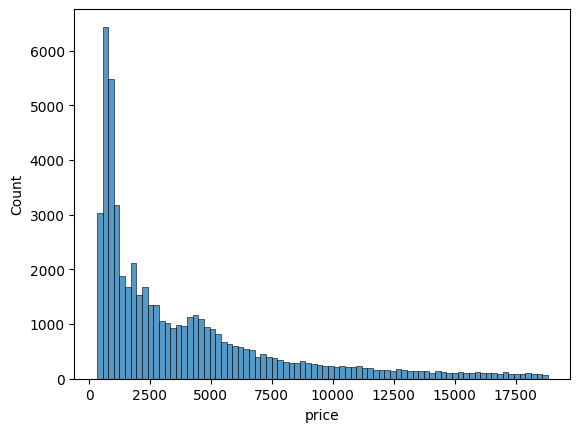

In [25]:
sns.histplot(df['price'])
plt.show()

Ну тут всё ожидаемо - чем дороже камни, тем реже они встречаются.

### 3. Постройте точечную диаграмму для двух числовых переменных

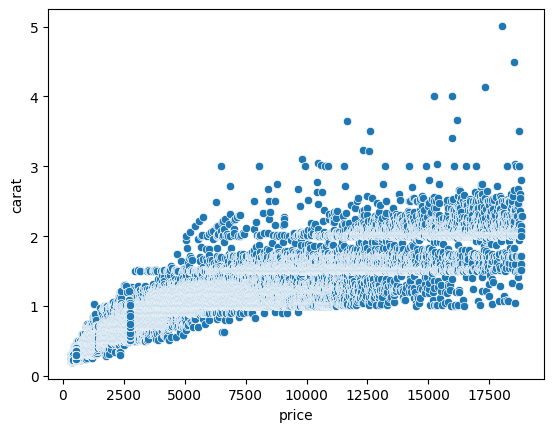

In [50]:
sns.scatterplot(data = df, x = 'price', y = 'carat')
plt.show()

Не очень красиво получилось. Но я специально выбирал самый большой датасет. Попробуем его сократить.

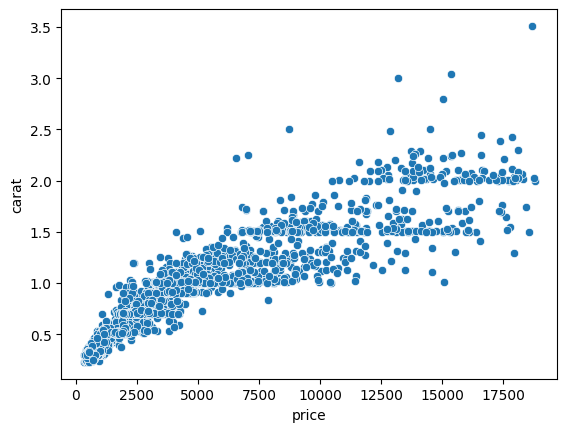

In [51]:
sns.scatterplot(data = df.sample(n=3000), x = 'price', y = 'carat')
plt.show()

Так, вроде, уже лучше. Зависимость между весом и ценой явно есть. Зависимость параболическая, т.е. цена растёт намного быстрее чем вес. С увеличением веса, увеличивается разброс цен. Ещё бросается в глаза скопление точек возле круглых значений веса (1, 1.5, 2) - прямо как результаты выборов в России. Но природа этого явления не понятна. Вероятно, должны быть какие-то фундаментальные факторы.

### 4. Постройте тепловую карту для двух категориальных переменных

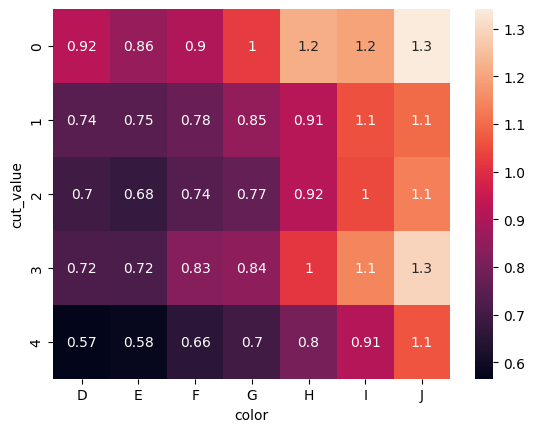

In [38]:
df2 = df.groupby(['cut_value', 'color'])['carat'].agg('mean').unstack()
sns.heatmap(df2, annot=True)
plt.show()

Здесь видна явная зависимость средней цены, как от качества, так и от цвета.  
В одной из предыдущих домашек, анализируя влияние качества на цену по числовым значениям я, возможно, сделал не верный вывод, что влияет только качество Fair и Ideal. Не знаю, проверили её уже или нет, поэтому исправлять не пойду.
Проблема в том, что категориальные переменные, представленные в виде текстовых значений трудно правильно отсортировать (там я пытался оценивать из на глаз). 
Здесь я специально привел качество к числовым значениям для сортировки от лучшего к худшему - чувствительность глаза это явно повысило. Даже без тепловой карты.